In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import DBSCAN

In [2]:
def test(file_name):
    data_frame = pd.read_csv('/home/mytrah-pc/Mytrah_Adithya/data_turbine/' + file_name)
    num_rows = data_frame.shape[0]
    filter_data_frame = data_frame.copy()[['ActivePower', 'WindSpeed']]
    filter_data_frame['set_in'] = -2
    min_active_power = filter_data_frame['ActivePower'].min()
    max_active_power = filter_data_frame['ActivePower'].max()
    min_wind_speed = filter_data_frame['WindSpeed'].min()
    max_wind_speed = filter_data_frame['WindSpeed'].max()
    global_max_p = max_active_power
    global_min_p = min_active_power

    """
    Subract all active power by min_active_power    
    Subract all wind speed by min_wind_speed
    Divide all active power by max_active_power - min_active_power
    Divide all wind speed by max_wind_speed - min_wind_speed
    """
    filter_data_frame['ActivePowerScaled'] = ((filter_data_frame['ActivePower'] - min_active_power) * 15) \
                                        / (max_active_power - min_active_power)

    filter_data_frame['WindSpeedScaled'] = ((filter_data_frame['WindSpeed'] - min_wind_speed) * 20) \
                                        / (max_wind_speed - min_wind_speed)

    scan = DBSCAN(eps=0.28, min_samples=15).fit_predict(filter_data_frame[['ActivePowerScaled', 'WindSpeedScaled']])

    filter_data_frame['set_in'] = scan

    import random
    r = lambda: random.randint(0,255)

    import matplotlib.pyplot as plt
    plt.figure(figsize=(10, 10))

    num_of_groups = 0
    static_compare = -1
    static_max = -2
    for group in filter_data_frame.groupby('set_in'):
        num_of_groups = num_of_groups + 1

        if len(group[1]) > static_compare:
            static_compare = len(group[1])
            static_max = group[0]

        plt.scatter(
            group[1]['WindSpeed'],
            group[1]['ActivePower'],
            s=np.pi*2*2,
            c='#c0c0c0'
        )



    loop_list = list(range(9) - np.ones(9))
    del loop_list[loop_list.index(static_max)]

    temp_frame = pd.concat([filter_data_frame[filter_data_frame['set_in'] == i] for i in loop_list])
    data_frame = temp_frame[(temp_frame['ActivePower'] < (global_max_p) * 0.8) & (temp_frame['ActivePower'] > (global_max_p) * 0.2)]

    num_rows = data_frame.shape[0]
    filter_data_frame = data_frame.copy()[['ActivePower', 'WindSpeed']]
    filter_data_frame['set_in'] = -2
    min_active_power = filter_data_frame['ActivePower'].min()
    max_active_power = filter_data_frame['ActivePower'].max()
    min_wind_speed = filter_data_frame['WindSpeed'].min()
    max_wind_speed = filter_data_frame['WindSpeed'].max()

    """
    Subract all active power by min_active_power    
    Subract all wind speed by min_wind_speed
    Divide all active power by max_active_power - min_active_power
    Divide all wind speed by max_wind_speed - min_wind_speed
    """
    filter_data_frame['ActivePowerScaled'] = ((filter_data_frame['ActivePower'] - min_active_power) * 250) \
                                        / (max_active_power - min_active_power)

    filter_data_frame['WindSpeedScaled'] = ((filter_data_frame['WindSpeed'] - min_wind_speed) * 20) \
                                        / (max_wind_speed - min_wind_speed)

    scan = DBSCAN(eps=2.5, min_samples=15).fit_predict(filter_data_frame[['ActivePowerScaled', 'WindSpeedScaled']])

    filter_data_frame['set_in'] = scan

    import random
    r = lambda: random.randint(0,255)

    num_of_groups = 0
    static_compare = -1
    static_max = -2
    for group in filter_data_frame.groupby('set_in'):
        num_of_groups = num_of_groups + 1

        if len(group[1]) > static_compare:
            static_compare = len(group[1])
            static_max = group[0]

        if(group[0] == -1):
            continue

        plt.scatter(
            group[1]['WindSpeed'],
            group[1]['ActivePower'],
            s=np.pi*2*2,
            c='#000000'#'#%02X%02X%02X' % (r(),r(),r())
        )


    plt.show()

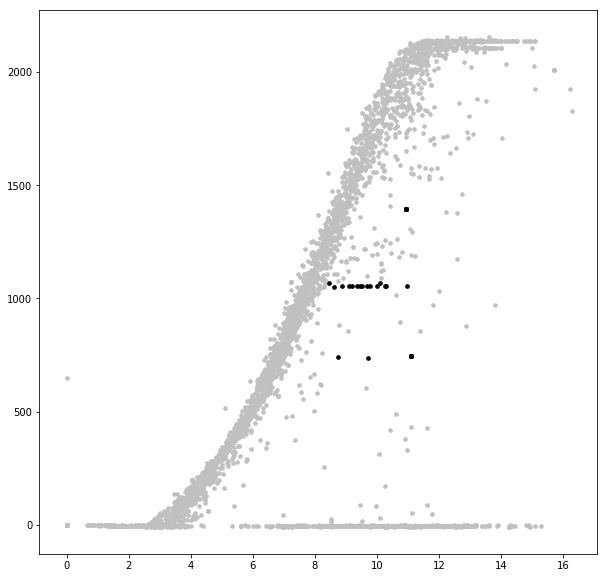

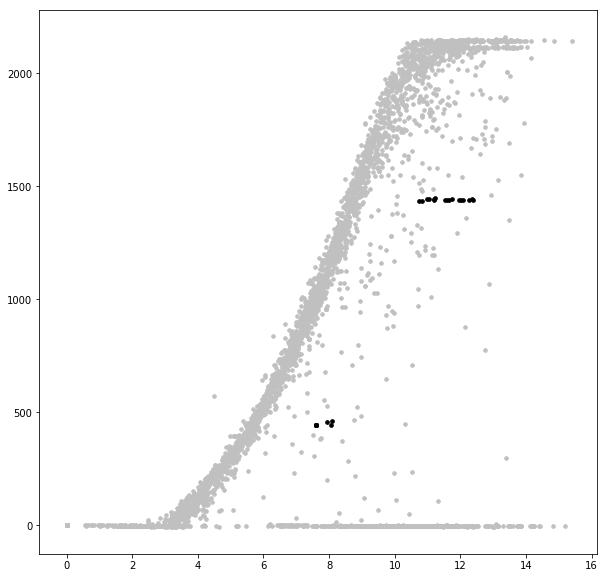

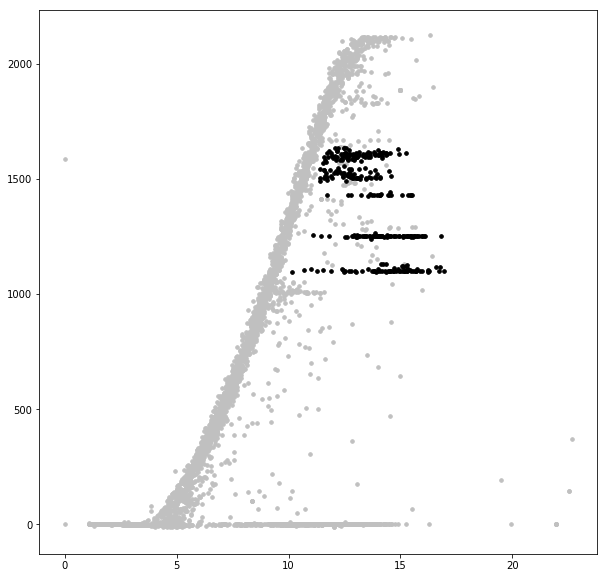

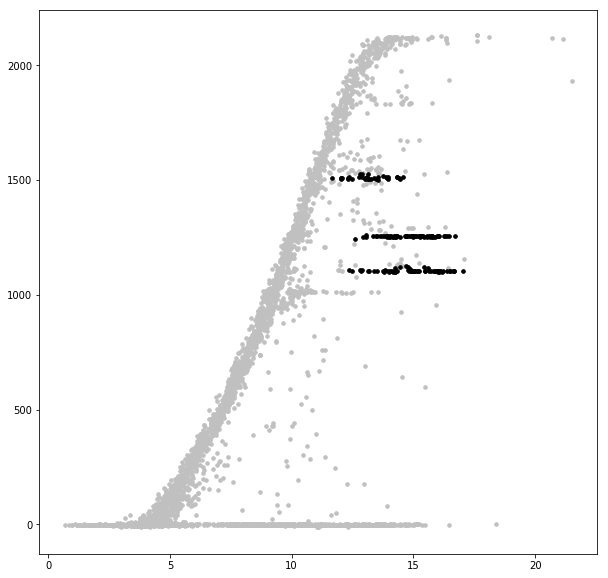

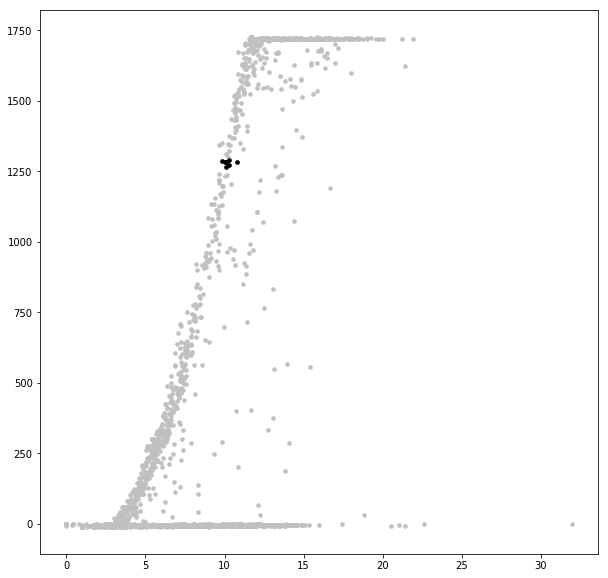

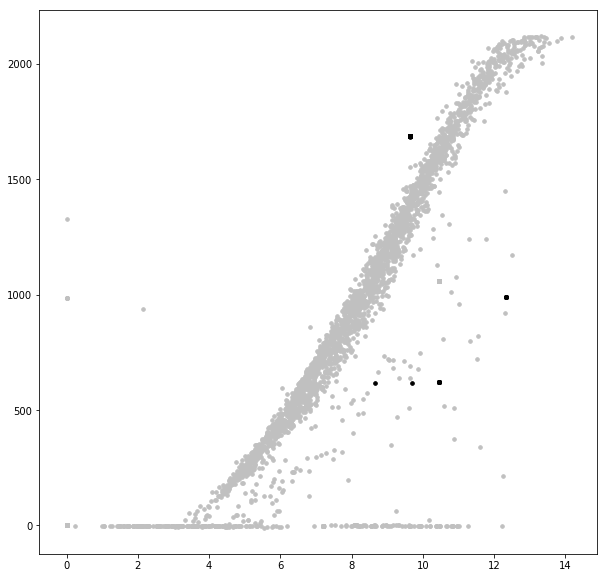

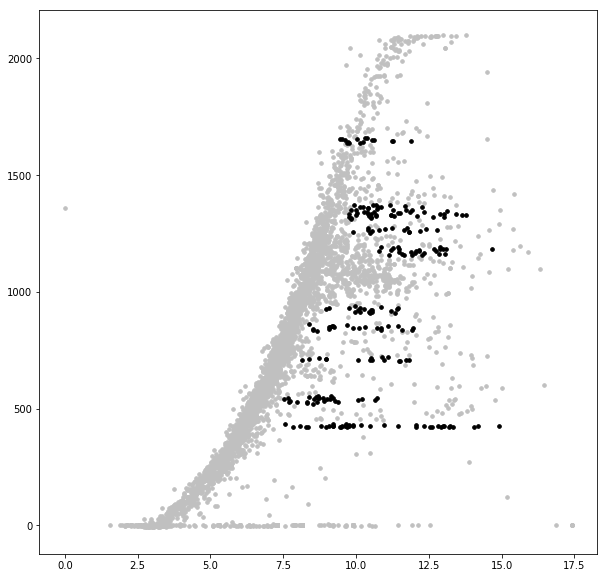

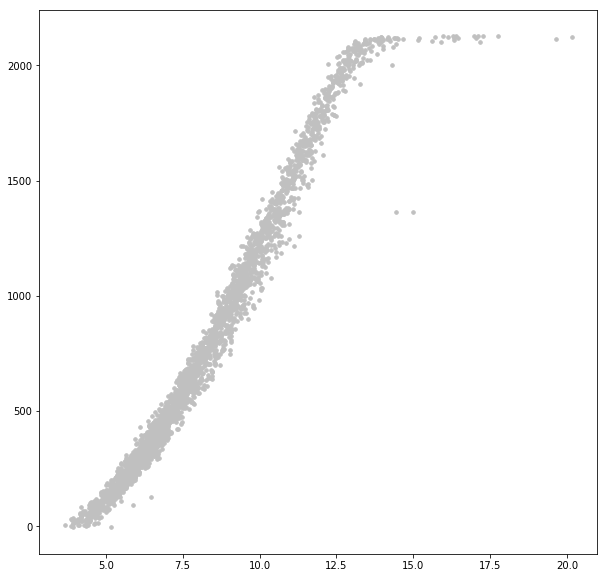

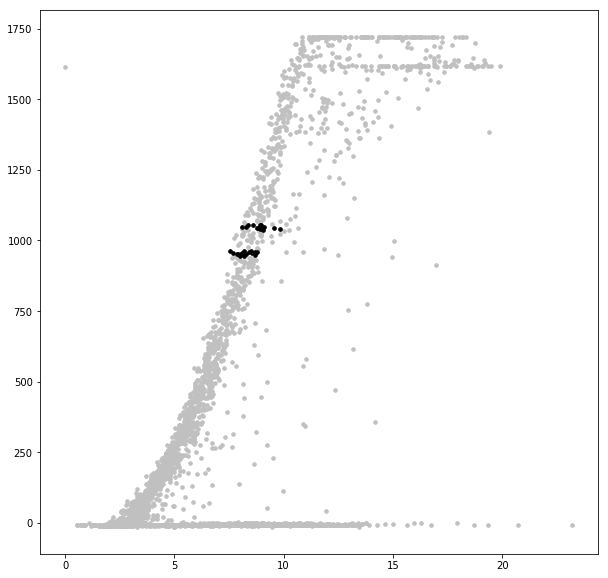

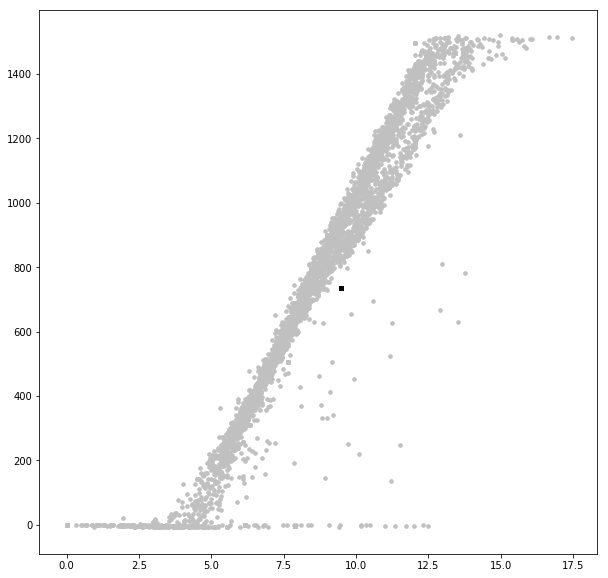

ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

In [3]:
from os import listdir
from os.path import isfile, join

data_path = '/home/mytrah-pc/Mytrah_Adithya/data_turbine/'
for f in listdir(data_path):
    test(f)